# Preparation

In [208]:
#encoding:utf-8
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xlrd
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict, learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn import model_selection
warnings.filterwarnings("ignore")

In [177]:
#loading files
excelFile1 = r'user_item_pair_train_ZP.xlsx'
excelFile2 = r'user_item_pair_train_XCQ.xlsx'
excelFile3 = r'user_item_pair_test_ZP.xlsx'
excelFile4 = r'user_item_pair_test_XCQ.xlsx'
df1 = pd.DataFrame(pd.read_excel(excelFile1))
df2 = pd.DataFrame(pd.read_excel(excelFile2))
df3 = pd.DataFrame(pd.read_excel(excelFile3))
df4 = pd.DataFrame(pd.read_excel(excelFile4))

In [179]:
df2 = df2.drop(columns=['label','user_id','item_id','time','id'])
df4 = df4.drop(columns=['label','user_id','item_id','time','id'])

In [180]:
train = pd.merge(df1,df2,left_index=True,right_index=True,how='outer')
test = pd.merge(df3,df4,left_index=True,right_index=True,how='outer')

In [181]:
train = train.dropna(how='all')
test = train.dropna(how='all')

In [182]:
train.head()

,user_id,item_id,label,time,1_user activity,1_number of items related,1_number of browsing actions,1_number of collecting actions,1_number of carting actions,1_number of buying actions,...,2_item_buypeople_collectpeople,2_item_buypeople_addpeople,2_item_frequentbuypeople_buypeople,2_item_frequentviewpeople_viewpeople,2_item_frequentcollectpeople_collectpeople,2_item_frequentaddpeople_addpeople,4_geo_purchasepower,4_geo_buyview,4_geo_buycollect,4_geo_buyadd
0,100029775,56574541,0,2014-12-17,97,37,91,6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.010460,0.011147,0.011147,0.357102
1,100029775,287413918,0,2014-12-17,97,37,91,6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.051261,0.057482,0.057482,0.940299
2,100029775,365811867,0,2014-12-17,97,37,91,6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.010460,0.011147,0.011147,0.357102
3,100029775,297443044,0,2014-12-17,97,37,91,6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.051261,0.057482,0.057482,0.940299
4,100029775,223294204,0,2014-12-17,97,37,91,6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.035714,0.040000,0.040000,1.000000


In [183]:
test.head()

,user_id,item_id,label,time,1_user activity,1_number of items related,1_number of browsing actions,1_number of collecting actions,1_number of carting actions,1_number of buying actions,...,2_item_buypeople_collectpeople,2_item_buypeople_addpeople,2_item_frequentbuypeople_buypeople,2_item_frequentviewpeople_viewpeople,2_item_frequentcollectpeople_collectpeople,2_item_frequentaddpeople_addpeople,4_geo_purchasepower,4_geo_buyview,4_geo_buycollect,4_geo_buyadd
0,100029775,56574541,0,2014-12-17,97,37,91,6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.010460,0.011147,0.011147,0.357102
1,100029775,287413918,0,2014-12-17,97,37,91,6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.051261,0.057482,0.057482,0.940299
2,100029775,365811867,0,2014-12-17,97,37,91,6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.010460,0.011147,0.011147,0.357102
3,100029775,297443044,0,2014-12-17,97,37,91,6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.051261,0.057482,0.057482,0.940299
4,100029775,223294204,0,2014-12-17,97,37,91,6,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.035714,0.040000,0.040000,1.000000


In [184]:
train = train.drop(columns=['user_id','item_id','time'])
test = test.drop(columns=['user_id','item_id','time'])

In [187]:
#standardization
y_train = train.label
X_train = train.drop(columns=['label'])
y_test = test.label
X_test = test.drop(columns=['label'])
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [189]:
#over&down sampling
data1 = train[train['label'] == 1]  # minority (buy) in data1
data0 = train[train['label'] == 0]  # majority (not buy) in data0
oversample = data1.sample(frac=6, replace=True)
downsample = data0.sample(frac=0.3, replace=True)
sample = oversample.append(downsample)
X_train=sample.drop(columns=['label'])
y_train=sample.label

# Lasso regression

# Gradient Search Part (to be run afterwards)
C_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = {'penalty': ['l1'],
              'C': C_range}
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=1),
                 param_grid=param_grid,
                 scoring='accuracy', 
                 refit=True,
                 cv=10,
                 n_jobs=-1)
gs_lr = gs_lr.fit(X, y)
print(gs_lr.best_score_)
print(gs_lr.best_params_)

In [190]:
lr = LogisticRegression(penalty='l1',C=0.01)
lr = lr.fit(X_train, y_train)
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
lr.coef_[lr.coef_!=0].shape # check the number of the features with non-zero weights

Training accuracy: 0.9116265001674354
Test accuracy: 0.4869796977014578


(25,)

In [191]:
print('most important features:',X_train.columns[np.where(lr.coef_[0]!=0),])

most important features: Index([['1_user activity', '1_number of items related', '1_number of browsing actions', '1_number of collecting actions', '1_number of carting actions', '1_number of buying actions', '1_behavior pattern', '1_ratio of browsing actions', '1_ratio of purchases to collects', '1_ratio of purchases to carting', '1_first time online', '1_last time online', '1_the behavior frequency', '3_number of categories related', '3_category_concentration_rate', '2_item_buy', '2_item_view', '2_item_collect', '2_item_add', '2_item_buy_collect', '2_item_buy_add', '2_item_buypeople', '2_item_viewpeople', '2_item_collectpeople', '4_geo_buyadd']], dtype='object')


In [195]:
#PCA+LR
#the function below is to plot the explained variance of pca
def plt_pca(X):   
    cov_mat = np.cov(X.T)
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    tot = sum(eigen_vals)
    var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    plt.figure(figsize = (10, 8), dpi = 300)
    plt.bar(range(1, 1+len(var_exp)), var_exp, alpha=0.6, align='center',label='explained variance')
    plt.step(range(1, 1+len(var_exp)), cum_var_exp, where='mid',label='cumulative variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component number')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title('Explained variance of pca')

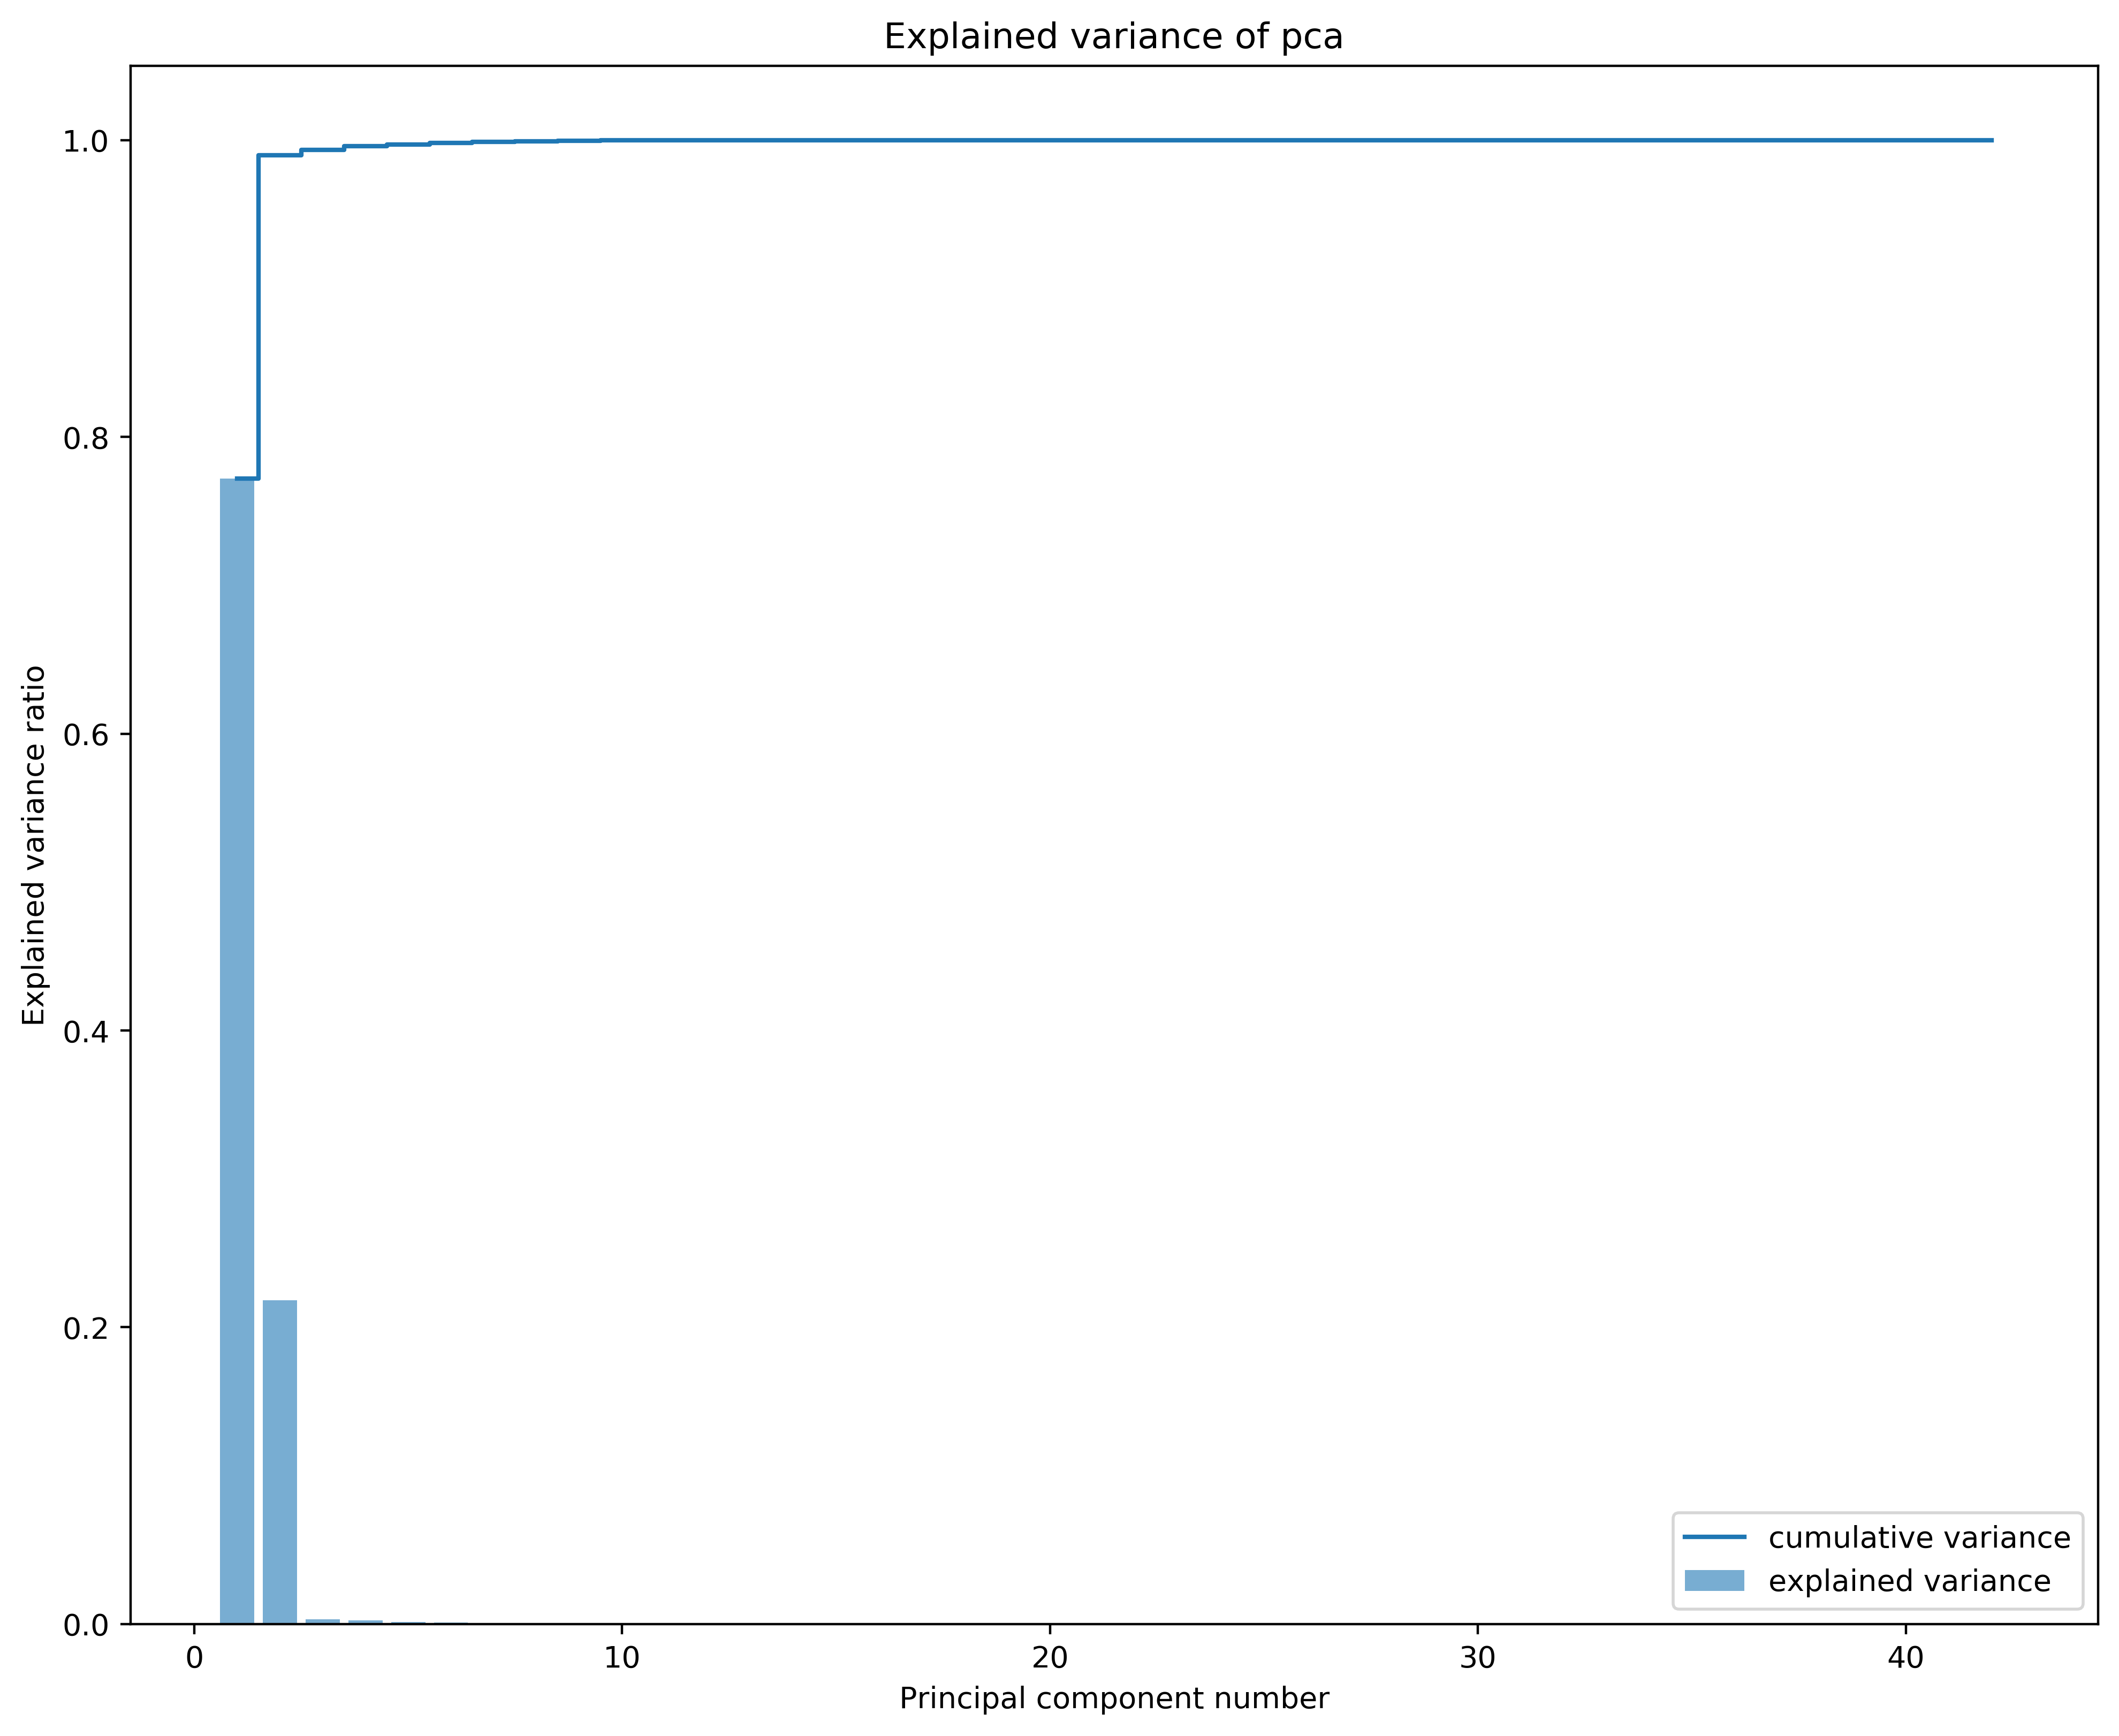

In [194]:
plt_pca(X_train)

In [201]:
pipe_lr = make_pipeline(PCA(n_components=2),LogisticRegression(random_state=1))
pipe_lr = pipe_lr.fit(X_train, y_train)
print('Training accuracy:', pipe_lr.score(X_train, y_train))
print('Test Accuracy:', pipe_lr.score(X_test, y_test))

Training accuracy: 0.9008998304041135
Test Accuracy: 0.9945300062606207


# Gradient Search Part (to be run afterwards)
C_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = {'penalty': ['l2'],
              'C': C_range,
              'solver': ['lbfgs']}
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=1),
                 param_grid=param_grid,
                 scoring='accuracy', 
                 refit=True,
                 cv=10,
                 n_jobs=-1)
gs_lr = gs_lr.fit(X_train_pca, y_train)
print(gs_lr.best_score_)
print(gs_lr.best_params_)
## SVM (to be run afterwards)
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs_svc = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs_svc = gs_svc.fit(X_train, y_train)
print(gs_svc.best_score_)
print(gs_svc.best_params_)

In [223]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.001, C=10.0)
svm.fit(X_train, y_train)
print('Training accuracy:', svm.score(X_train, y_train))
print('Test accuracy:', svm.score(X_test_std, y_test))

Training accuracy: 0.9455888866084063
Test accuracy: 0.9945300062606207


In [206]:
rfc = RandomForestClassifier(n_estimators=100)
rfc = rfc.fit(X_train,y_train)
print('Training accuracy:', rfc.score(X_train, y_train))
print('Test Accuracy:', rfc.score(X_test, y_test))

Training accuracy: 0.9665993324187399
Test Accuracy: 0.9723030140416778


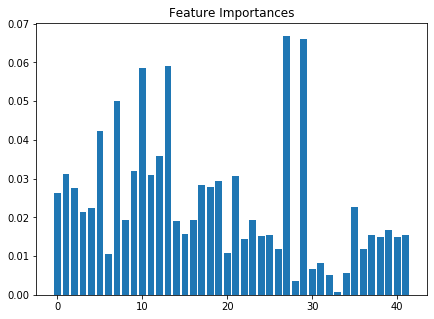

In [220]:
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(len(rfc.feature_importances_)),rfc.feature_importances_)
ax.set_title("Feature Importances")
f.show()

In [222]:
print('most important features:',X_train.columns[(26,28),])

most important features: Index(['2_item_buy_add', '2_item_viewpeople'], dtype='object')


In [205]:
gbc = GradientBoostingClassifier()
gbc = gbc.fit(X_train,y_train)
print('Training accuracy:', gbc.score(X_train, y_train))
print('Test Accuracy:', gbc.score(X_test, y_test))

Training accuracy: 0.925064543657438
Test Accuracy: 0.988806010195868


# Validation

In [211]:
# F-1 score for RF
y_train_pred = cross_val_predict(rfc, X_train, y_train, cv=5)
f = f1_score(y_train, y_train_pred)
print("F1 Score: {0:.2%}".format(f))

F1 Score: 80.53%


<Figure size 3000x1800 with 0 Axes>

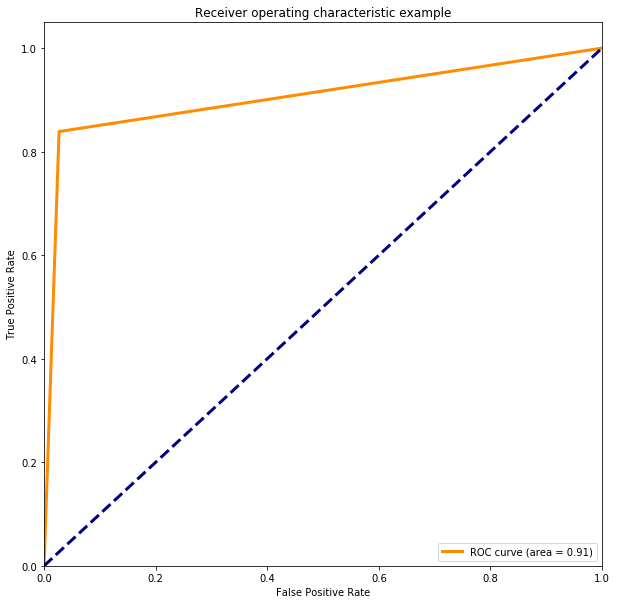

In [213]:
# plot ROC curve for RF
def plt_ROC(y,Y):
    fpr, tpr, threshold = roc_curve(y, Y)  # get TPR and FPR
    roc_auc = auc(fpr, tpr) 

    plt.figure(figsize = (10, 6), dpi = 300)
    lw = 3
    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, color='darkorange',
             lw = lw, label='ROC curve (area = %0.2f)' % roc_auc)  # FPR as x，TPR as y
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
plt_ROC(y_train, y_train_pred)
plt.savefig('ROC for RF.jpg', dpi = 300)
plt.show()

In [214]:
# F-1 score for GBC
y_train_pred = cross_val_predict(gbc, X_train, y_train, cv=5)
f = f1_score(y_train, y_train_pred)
print("F1 Score: {0:.2%}".format(f))

F1 Score: 45.15%


<Figure size 3000x1800 with 0 Axes>

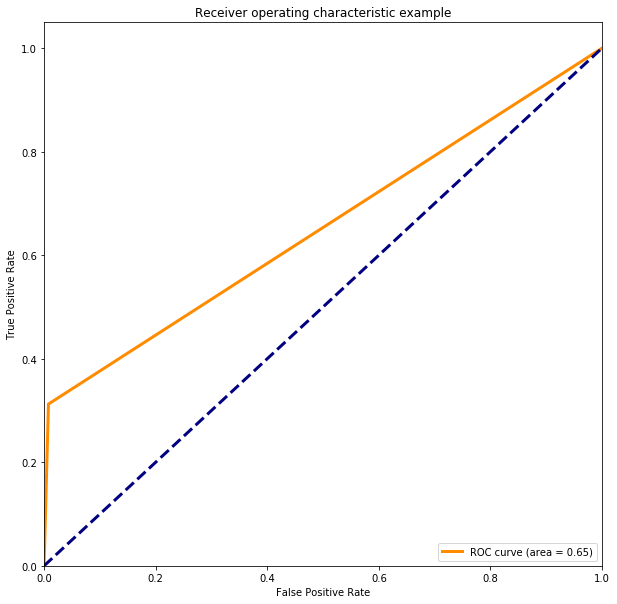

In [215]:
# plot ROC curve for GBC
def plt_ROC(y,Y):
    fpr, tpr, threshold = roc_curve(y, Y)  # get TPR and FPR
    roc_auc = auc(fpr, tpr) 

    plt.figure(figsize = (10, 6), dpi = 300)
    lw = 3
    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, color='darkorange',
             lw = lw, label='ROC curve (area = %0.2f)' % roc_auc)  # FPR as x，TPR as y
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
plt_ROC(y_train, y_train_pred)
plt.savefig('ROC for GBC.jpg', dpi = 300)
plt.show()